# Unsupervised Learning: Principal Component Analysis

Real world data can have very large dimensions i.e attributes. Visualizing and analysing 4 dimensional data can be challenging and difficult. This difficulty increases exponentially with the number of dimensions. 

This well known issue is identified as *the curse of dimensionality*.

PCA stands for principal component analysis. It is a linear dimensionality reduction technique which projects data into a lower dimensional space. 

In [1]:
!pip install sklearn
!pip install numpy

Now let's import all the required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer as Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from warnings import filterwarnings
filterwarnings('ignore')

## Load Raw Data

In [3]:
df = pd.read_csv("credit_train.csv")

In [4]:
# df = df[:10000]

In [5]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

## Data Preprocessing

#### Feature Selection

In [7]:
cols_to_remove = ['Loan ID','Customer ID']
data = df.drop(cols_to_remove, axis=1)


#### Data Cleaning

In [8]:
#Imputation strategy: Replace Non-existing values with the respective column's average
cols_to_clean =['Current Loan Amount','Credit Score','Annual Income','Years of Credit History',
        'Months since last delinquent','Number of Open Accounts','Number of Credit Problems',
       'Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']

imputer = Imputer()
data[cols_to_clean] = imputer.fit_transform(data[cols_to_clean])
data[cols_to_clean] = data[cols_to_clean].astype(int)

#Remove rows that still contain at least one NaN value
data=data.dropna()



#### Feature Engineering

In [9]:
#Convert our target attribute to numerical values
y = []
for i in data['Loan Status']:
    if i == 'Fully Paid':
        y.append(1)
    else:
        y.append(0)

data = data.drop('Loan Status', axis=1)

In [10]:
data.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412,Short Term,709,1167493,8 years,Home Mortgage,Home Improvements,5214.74,17,34,6,1,228190,416746,1,0
1,262328,Short Term,1076,1378276,10+ years,Home Mortgage,Debt Consolidation,33295.98,21,8,35,0,229976,850784,0,0
2,99999999,Short Term,741,2231892,8 years,Own Home,Debt Consolidation,29200.53,14,29,18,1,297996,750090,0,0
3,347666,Long Term,721,806949,3 years,Own Home,Debt Consolidation,8741.90,12,34,9,0,256329,386958,0,0
4,176220,Short Term,1076,1378276,5 years,Rent,Debt Consolidation,20639.70,6,34,15,0,253460,427174,0,0


In [11]:
# Convert categorical attributes to numerical values

print(data.info())
data = pd.get_dummies(data)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95778 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           95778 non-null  int64  
 1   Term                          95778 non-null  object 
 2   Credit Score                  95778 non-null  int64  
 3   Annual Income                 95778 non-null  int64  
 4   Years in current job          95778 non-null  object 
 5   Home Ownership                95778 non-null  object 
 6   Purpose                       95778 non-null  object 
 7   Monthly Debt                  95778 non-null  float64
 8   Years of Credit History       95778 non-null  int64  
 9   Months since last delinquent  95778 non-null  int64  
 10  Number of Open Accounts       95778 non-null  int64  
 11  Number of Credit Problems     95778 non-null  int64  
 12  Current Credit Balance        95778 non-null  int64  
 13  M

In [12]:
# Data Normalization

xMean = np.mean(data, axis=0)
xDev = np.std(data, axis=0)
xNorm = (data - xMean) / xDev

x = data.values #returns numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xMinMax = pd.DataFrame(x_scaled)
xNoNorm = data


In [13]:
# Run PCA with n_components==number of attributes
pca = PCA(n_components=11)
reducedX = pca.fit_transform(xMinMax)
print("Explained variance of 11 components:\n", pca.explained_variance_ratio_)

Explained variance of 11 components:
 [0.21287996 0.15948045 0.09725105 0.08381835 0.05079623 0.04291126
 0.03916739 0.0360038  0.03283287 0.02931929 0.02772559]


In [14]:
# Run PCA with 2 components, for 2d visualising.
pca = PCA(n_components=2)

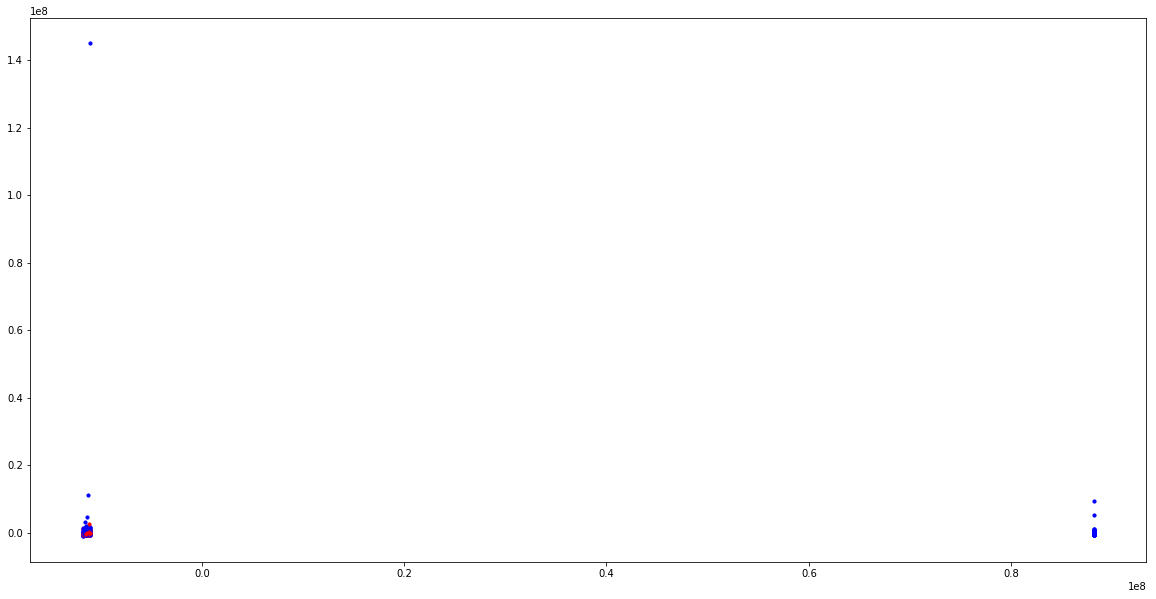

In [15]:
# Reduce Non-Normalized data
reducedX = pca.fit_transform(xNoNorm)

fig, ax = plt.subplots(figsize=(20, 10))

colors = ['blue' if l==1 else 'red' for l in y]
for dp, c in zip(reducedX[:1000], colors[:1000]):
    ax.scatter(dp[0], dp[1], s=10, color=c)
plt.show()

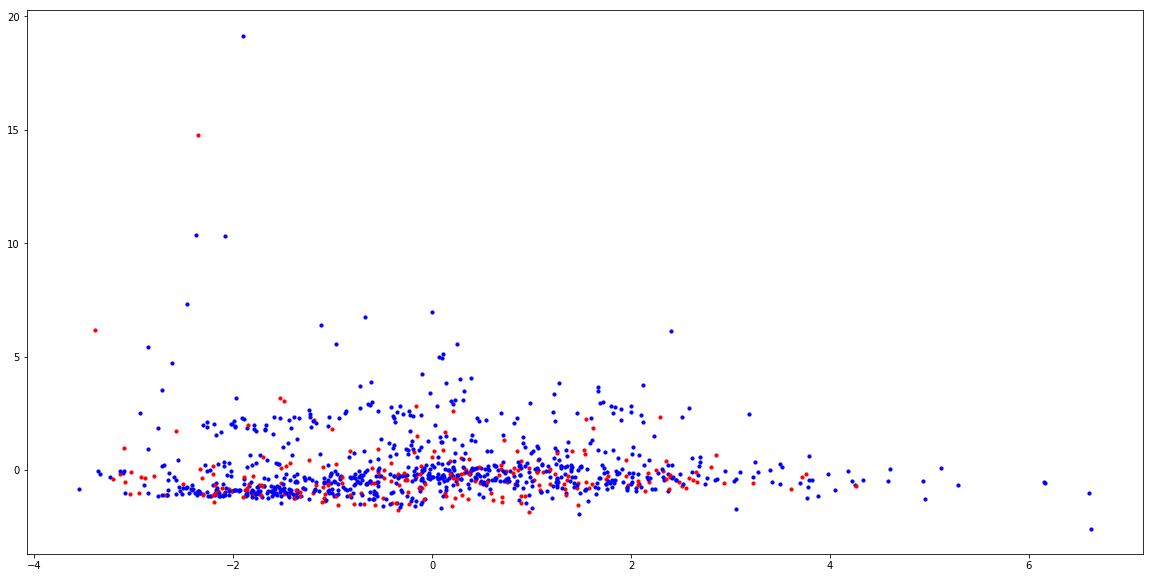

In [16]:
# Reduce L2-Normalized data
reducedX = pca.fit_transform(xNorm)

fig, ax = plt.subplots(figsize=(20, 10))

colors = ['blue' if l==1 else 'red' for l in y]
for dp, c in zip(reducedX[:1000], colors[:1000]):
    ax.scatter(dp[0], dp[1], s=10, color=c)
plt.show()

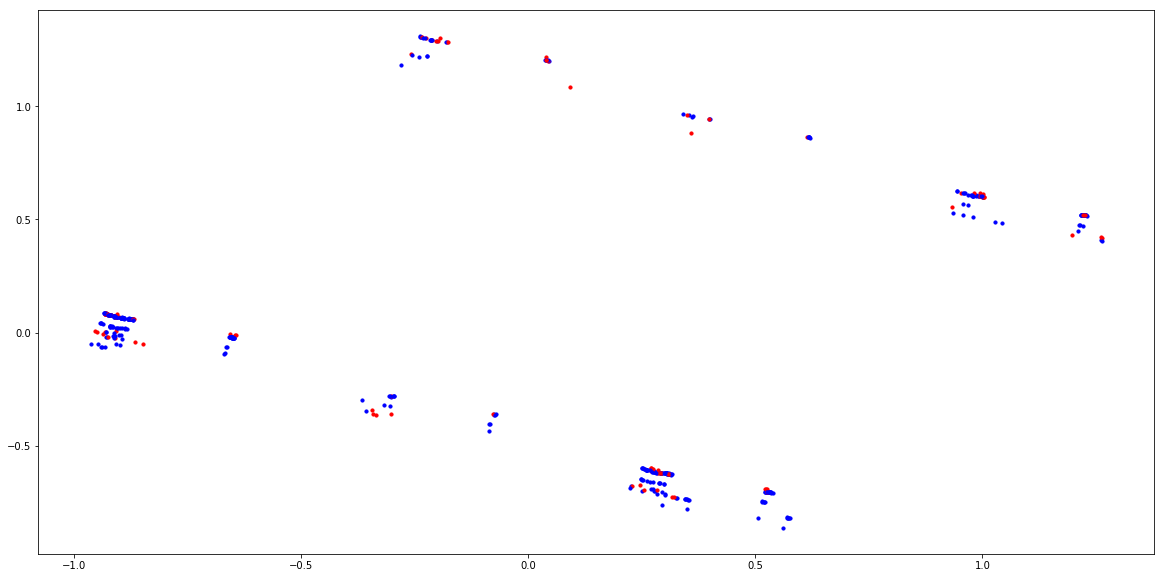

In [17]:
# Reduce MinMax-Normalized data

reducedX = pca.fit_transform(xMinMax)

fig, ax = plt.subplots(figsize=(20, 10))

colors = ['blue' if l==1 else 'red' for l in y]
for dp, c in zip(reducedX[:500], colors[:500]):
    ax.scatter(dp[0], dp[1], s=10, color=c)
plt.show()

In [19]:
#Perform predictions with reduced dimensionality

for n_comp in range(1, 14):
    pca = PCA(n_components=n_comp)
    reducedX = pca.fit_transform(xNorm)
    X_train, X_test, y_train, y_test = train_test_split(reducedX, y, test_size=0.5, random_state=13)

    clf = LogisticRegression().fit(X_train, y_train)
    score = accuracy_score(y_test, clf.predict(X_test))

    print('Accuracy with {} components: {:.4f}%'.format(n_comp, 100*score))

Accuracy with 1 components: 77.8133%
Accuracy with 2 components: 77.8154%
Accuracy with 3 components: 77.8133%
Accuracy with 4 components: 77.8133%
Accuracy with 5 components: 77.8133%
Accuracy with 6 components: 77.8154%
Accuracy with 7 components: 77.8049%
Accuracy with 8 components: 77.8133%
Accuracy with 9 components: 77.7256%
Accuracy with 10 components: 80.6970%
Accuracy with 11 components: 78.3771%
Accuracy with 12 components: 81.8664%
Accuracy with 13 components: 81.6847%
